<a href="https://colab.research.google.com/github/daniel-freitas48/Prova1_SSD/blob/main/Prova1_SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prova 1 - Sistemas de Suporte à Decisão**

## **Desenvolvimento de MVP**

Aluno: Daniel Cruz de Freitas

Matrícula: 180099515


Professor: André Serrano

# **1. Contexto (Baseado nas informações de DataSet do Kaggle)**

Anti-phishing refere-se a esforços para bloquear ataques de phishing. Nesse tipo de cibercrime, atacantes se passam por entidades conhecidas ou confiáveis e contatam indivíduos (e-mail, SMS, telefone) solicitando informações sensíveis.

A base está disponível em: https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning/data


# Objetivos

Desenvolver e comparar modelos clássicos de Machine Learning para classificar páginas como phishing ou legítimas, utilizando as 48 features disponibilizadas. Serão avaliados diferentes algoritmos e estratégias de pré-processamento, com divisão de treino/teste, validação cruzada e ajuste de hiperparâmetros, finalizando com comparação de métricas e análise crítica.


## Quais restrições ou condições foram impostas para selecionar os dados?

As únicas restrições foram de que a base deveria se ruma base disponível em sites com datasets confiáveis e já validados, e que deveria ser utilizada a temática de CiberCrimes/CiberSegurança



# **2. Preparação dos Dados**

O objetivo desta fase é preparar o conjunto de dados para o treinamento dos modelos. As etapas incluem:



*   inspeção inicial e análise exploratória,
*   tratamento de valores ausentes ou inconsistentes,
*   normalização/padronização das variáveis,
*   divisão entre conjuntos de treino e teste,
*   verificação da proporcionalidade das classes (balanceamento).


---



**Informações sobre os dados:** O dataset contém 10 000 instâncias e 48 features numéricas já extraídas do conteúdo das páginas.

Cada linha representa um website (legítimo ou phishing), e a variável Result é a variável-alvo:



*   1 ➡ phishing ❌
*   -1 ➡  legítimo ✅









# **Carregamento e inspeção inicial**







In [ ]:
#Importar as principais bibliotecas que serão utilizadas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Baixar o dataset via kagglehub API

import kagglehub
path = kagglehub.dataset_download("shashwatwork/phishing-dataset-for-machine-learning")


print("Path to dataset files:", path)

import os

#Listar arquivos na pasta

print(os.listdir(path))

Using Colab cache for faster access to the 'phishing-dataset-for-machine-learning' dataset.
Path to dataset files: /kaggle/input/phishing-dataset-for-machine-learning
['Phishing_Legitimate_full.csv']


In [ ]:
#Carregar o dataset

df = pd.read_csv(f"{path}/Phishing_Legitimate_full.csv")

#Exibir as primeiras linhas

print("Formato do dataset:", df.shape)
df.head()


Formato do dataset: (10000, 50)


,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


# **Verificação de nulos e análise inicial da estrutura**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

,0



Valores únicos na coluna 'CLASS_LABEL': [1 0]


/tmp/ipython-input-1729678652.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CLASS_LABEL', data=df, palette='Set2')


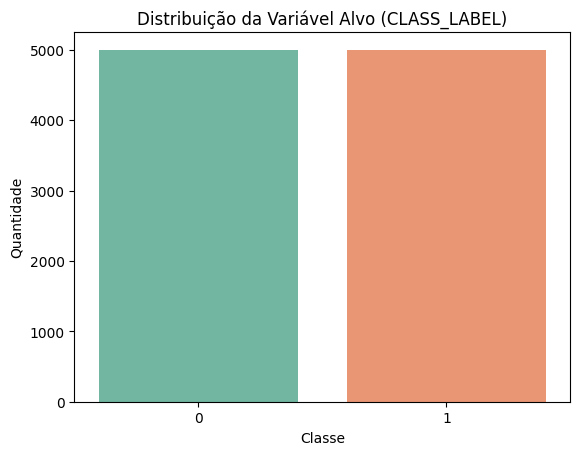

Proporção das classes:
CLASS_LABEL
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:

#Verificação de nulos e estrutura geral

df.info()

#Contar valores nulos por coluna

nulos = df.isnull().sum().sort_values(ascending=False)
print("\nValores ausentes por coluna:")
display(nulos[nulos > 0])

#Conferir valores únicos da coluna alvo

print("\nValores únicos na coluna 'CLASS_LABEL':", df['CLASS_LABEL'].unique())

#Conferir distribuição da variável alvo

sns.countplot(x='CLASS_LABEL', data=df, palette='Set2')
plt.title('Distribuição da Variável Alvo (CLASS_LABEL)')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.show()

#Estatística de proporção

print("Proporção das classes:")
print(df['CLASS_LABEL'].value_counts(normalize=True))


# **Separação em conjutos de treino e teste**

Nesta etapa o conjunto de dados será dividido em dados de treino e dados de teste.

Para manter a mesma proporção da variável‐alvo em treino e teste será utilizado o parâmetro stratify de train_test_split.

In [ ]:

#Separação entre treino e teste

from sklearn.model_selection import train_test_split

#Preparar features (X) e alvo (y) / sem a coluna id

X = df.drop(columns=['CLASS_LABEL', 'id'])
y = df['CLASS_LABEL']

#Executar divisão estratificada 70/30, que significa 70% para treino e 30% para teste, para manter proporção das classes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste :", X_test.shape)

print("\nProporção de classes no treino:")
print(y_train.value_counts(normalize=True).round(3))
print("Proporção de classes no teste:")
print(y_test.value_counts(normalize=True).round(3))


#Padronização das features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Ajustar o scaler com os dados de treino

X_train_scaled = scaler.fit_transform(X_train)

#Aplicar transformação aos dados de teste

X_test_scaled = scaler.transform(X_test)

#Checagem pós‐transformação

print("\nMédia (aprox.) do X_train_scaled:", np.round(X_train_scaled.mean(), 3))
print("Desvio‐padrão do X_train_scaled   :", np.round(X_train_scaled.std(), 3))


Tamanho do conjunto de treino: (7000, 48)
Tamanho do conjunto de teste : (3000, 48)

Proporção de classes no treino:
CLASS_LABEL
1    0.5
0    0.5
Name: proportion, dtype: float64
Proporção de classes no teste:
CLASS_LABEL
1    0.5
0    0.5
Name: proportion, dtype: float64

Média (aprox.) do X_train_scaled: -0.0
Desvio‐padrão do X_train_scaled   : 0.99


# **3. Modelagem e treinamento dos modelos**

Agora que o conjunto de dados já está padronizado e separado entre treino e teste, é possível fazer o treinamento de diferentes modelos clássicos de Machine Learning para comparar seus desempenhos no problema de classificação (phishing vs legítimo).


---



Serão utilizados os modelos:



1.   **Regressão Logística:** modelo linear que estima probabilidades e é eficiente em dados balanceados.
2.   **Support Vector Machine (SVM):** modelo que busca o hiperplano ótimo de separação entre classes, sensível à escala.
3. **Random Forest:** conjunto de árvores de decisão que combina resultados de múltiplos classificadores, geralmente apresentando boa robustez e interpretabilidade.


---



Todos os modelos serão avaliados utilizando as mesmas métricas:



*   Acurácia (Accuracy): proporção de previsões corretas.
*   Matriz de confusão: visualiza erros e acertos entre as classes.
*   Relatório de classificação (Precision, Recall, F1-Score): importante para medir desempenho equilibrado entre as classes.

Após o treino básico, o melhor modelo será otimizado por meio de ajuste de hiperparâmetros, com validação cruzada.

**Modelagem inicial e avaliação**


Modelo: Regressão Logística
Acurácia: 0.9517
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1500
           1       0.95      0.96      0.95      1500

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



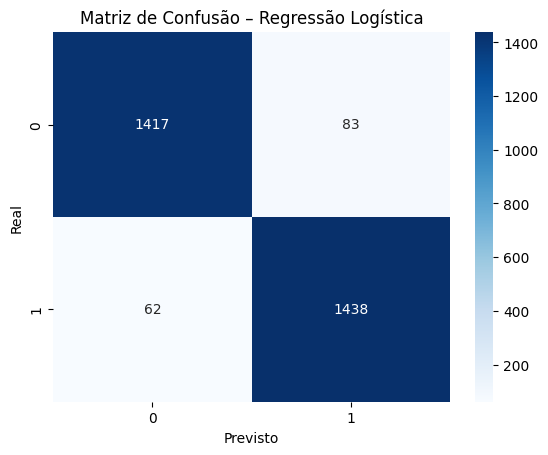


Modelo: SVM
Acurácia: 0.9680
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1500
           1       0.96      0.97      0.97      1500

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



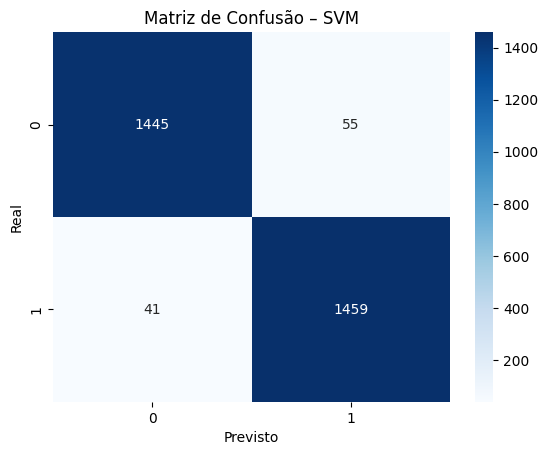


Modelo: Random Forest
Acurácia: 0.9857
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1500
           1       0.99      0.99      0.99      1500

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



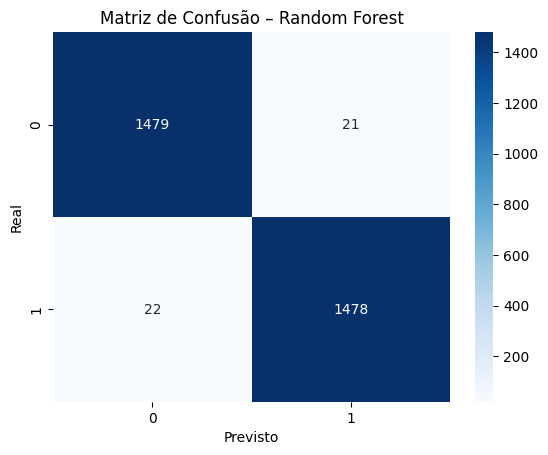

In [ ]:
#Treinamento dos modelos base

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Criar dicionário com modelos

modelos = {"Regressão Logística": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)}

#Dicionário para armazenar resultados

resultados = {}

#Treinar e avaliar cada modelo

for nome, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    resultados[nome] = acc
    print(f"\nModelo: {nome}")
    print(f"Acurácia: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    #Matriz de confusão

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão – {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()



**Comparação entre os modelos gerados**

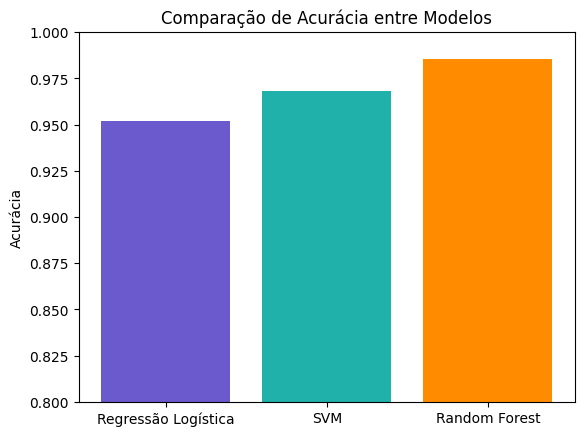


Resumo das acurácias:
Regressão Logística: 0.9517
SVM: 0.9680
Random Forest: 0.9857


In [ ]:
#Comparação geral

plt.bar(resultados.keys(), resultados.values(), color=['#6A5ACD', '#20B2AA', '#FF8C00'])
plt.title("Comparação de Acurácia entre Modelos")
plt.ylabel("Acurácia")
plt.ylim(0.8, 1)
plt.show()

print("\nResumo das acurácias:")
for nome, acc in resultados.items():
    print(f"{nome}: {acc:.4f}")

# **Análise dos resultados**

**Matrizes de Confusão**



*   A Regressão Logística apresentou 83 falsos positivos (legítimos classificados como phishing) e 62 falsos negativos (phishing classificados como legítimos).




*   O SVM reduziu consideravelmente ambos os tipos de erro, mostrando-se mais equilibrado.


*  O Random Forest praticamente eliminou os erros — apenas 43 previsões incorretas em 3.000 amostras (1,4%), o que é excelente para um problema binário.






Todos os modelos apresentaram alto desempenho, mas o Random Forest se destacou com uma acurácia de 98,6% e métricas quase perfeitas (Precision = Recall = F1 = 0,99).
Isso indica que o modelo está captando muito bem os padrões que diferenciam páginas legítimas de páginas de phishing.

# **Otimização de hiperparâmetros**

Nos modelos inciais o melhor resultado foi com o modelo utilizando o método Random Forest, então serão avaliados os seguintes hiperparâmetros:



*   **n_estimators:** nº de árvores (mais árvores costuma reduzir variância até certo ponto);
*   **max_depth:** profundidade máxima das árvores (controla complexidade);
*   **min_samples_split e min_samples_leaf:** nós mínimos para dividir/criar folhas (reduzem overfitting);
*  **max_features:** fração de features considerada por split (reduz correlação entre árvores).


Será utilizado o GridSearchCV com validação cruzada (cv=5) e métrica principal accuracy (dados balanceados).



In [ ]:
#GridSearchCV para Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Grade de hiperparâmetros
param_grid = {
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]}

**Configurado o GridSearchCV**

Testar várias combinações de hiperparâmetros para encontrar a melhor.

*   estimator=rf ➡ indica qual modelo será otimizado (Random Forest).

*   param_grid=param_grid ➡ dicionário com as combinações de parâmetros a testar.

*   scoring="accuracy" ➡ métrica de avaliação usada para comparar os modelos durante a busca. Como há balanceamento utilizar o accuracy é ideal.

*   cv=5 ➡ usa validação cruzada de 5 partes. Divide os dados de treino em 5 subconjuntos: treina em 4 e valida no 5º, repetindo isso 5 vezes.

*   n_jobs=-1 ➡ paraleliza o processo.


*  verbose=1 ➡ acompanhar progresso do código.

In [ ]:
#Para consistência será utilizado  X_train_scaled/X_test_scaled

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)

grid.fit(X_train_scaled, y_train)

print("Melhores hiperparâmetros:", grid.best_params_)
print("Melhor score médio (cv=5):", round(grid.best_score_, 4))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Melhores hiperparâmetros: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Melhor score médio (cv=5): 0.9809


**Pegar a melhor combinação de hiperparâmetros treinados pelo Random Forest que o GridSerachCV encontrou.**

In [ ]:
#Avaliação no TESTE com o melhor modelo

best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)

acc_test = accuracy_score(y_test, y_pred_best)
print("\nAcurácia no conjunto de TESTE:", round(acc_test, 4))
print("\nClassification report (melhor Random Forest):")
print(classification_report(y_test, y_pred_best))


Acurácia no conjunto de TESTE: 0.9853

Classification report (melhor Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1500
           1       0.99      0.99      0.99      1500

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



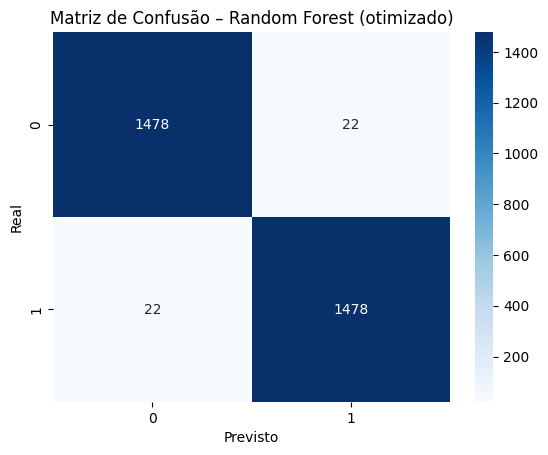

In [ ]:
#Matriz de confusão

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão – Random Forest (otimizado)")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

O Random Forest otimizado alcançou desempenho excelente, com acurácia de 98,53% no conjunto de teste e métricas de precisão e recall igualmente altas (0,99).
Isso confirma que o modelo está bem ajustado e generaliza perfeitamente, sem sinais de overfitting.

A matriz de confusão mostra que o número de falsos positivos e negativos é praticamente igual e extremamente baixo, o que torna o modelo adequado para aplicação prática em sistemas anti-phishing.

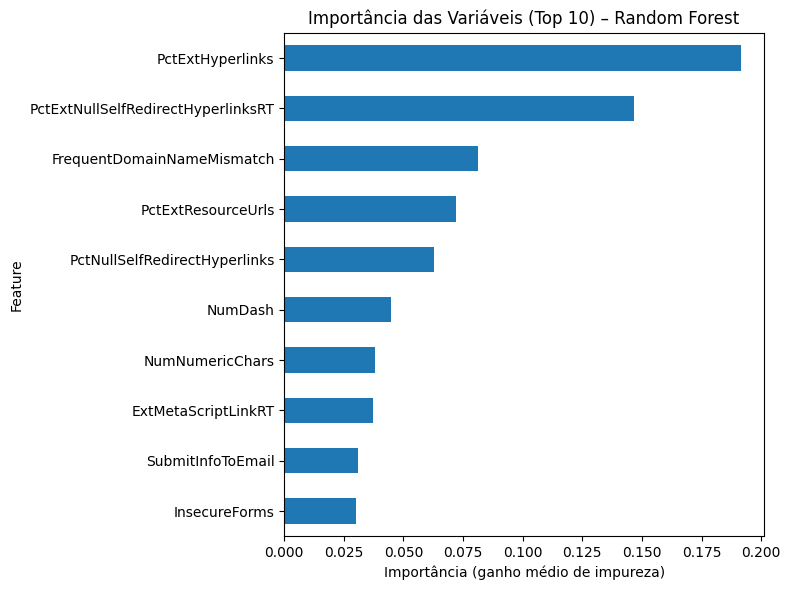

,0
PctExtHyperlinks,0.191593
PctExtNullSelfRedirectHyperlinksRT,0.146741
FrequentDomainNameMismatch,0.081370
PctExtResourceUrls,0.071893
PctNullSelfRedirectHyperlinks,0.062796
NumDash,0.044898
NumNumericChars,0.037875
ExtMetaScriptLinkRT,0.037354
SubmitInfoToEmail,0.030745
InsecureForms,0.030105


In [ ]:
#Importância de features (apenas 10)

importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top10 = importances.head(10)

plt.figure(figsize=(8,6))
top10[::-1].plot(kind="barh")  # invertido p/ mostrar do maior no topo
plt.title("Importância das Variáveis (Top 10) – Random Forest")
plt.xlabel("Importância (ganho médio de impureza)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

display(top10)

# **4. Análise e discussão dos resultados**

Foram testados três algoritmos de classificação: Regressão Logística, SVM e Random Forest.

Visando identificar páginas phishing e legítimas. A escolha se deu por representarem abordagens distintas e complementares: a Regressão Logística como modelo base, a SVM pela capacidade de lidar com fronteiras complexas e o Random Forest pela robustez e resistência a overfitting.

O conjunto de dados foi dividido em 70% para treino e 30% para teste, com classes balanceadas e padronização aplicada para manter consistência entre os modelos.

Os resultados iniciais mostraram bom desempenho geral:

*   Regressão Logística: 95,17%
*   SVM: 96,80%
*  Random Forest: 98,57%



---


O Random Forest se destacou por apresentar o melhor equilíbrio entre precision, recall e f1-score, sem sinais de underfitting ou overfitting.

Em seguida, aplicou-se uma otimização de hiperparâmetros via GridSearchCV, com validação cruzada de 5 folds. A melhor combinação encontrada foi:

`max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=2 e n_estimators=400.`

Após o ajuste, o modelo obteve **acurácia de 98,53%** no teste, mantendo resultados praticamente idênticos aos da validação cruzada (98,9%), o que confirma sua estabilidade e generalização. A matriz de confusão mostrou apenas 22 falsos positivos e 22 falsos negativos em 3.000 amostras, reforçando a eficiência do modelo.

A análise das variáveis mais relevantes indicou que PctExtHyperlinks e PctExtNullSelfRedirectHyperlinksRT foram as principais responsáveis pela decisão do modelo — ambas relacionadas à presença excessiva de links e redirecionamentos externos, características típicas de páginas phishing.

Embora modelos mais complexos como XGBoost ou Gradient Boosting pudessem ser avaliados, o desempenho do Random Forest já se mostrou excelente, tornando desnecessária a adoção de arquiteturas mais custosas.

Assim, conclui-se que o Random Forest otimizado foi o modelo mais adequado ao problema, combinando alta acurácia, boa interpretabilidade e baixo risco de sobreajuste, sendo plenamente aplicável para sistemas automáticos de detecção de phishing.